<a href="https://colab.research.google.com/github/eckoecho/CodingDojo/blob/week-10/Week%2010/PCA_to_Speed_up_Machine_Learning_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [49]:
fpath="/content/drive/MyDrive/CodingDojo/03-AdvancedML/Week10/Data/wisconsinBreastCancer.csv"
df = pd.read_csv(fpath)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Dropping Unnecceary Columns

In [50]:
df.drop(columns="Unnamed: 32", inplace=True)

# Binarize Column

In [51]:
# Binarize target column
df["diagnosis"] = df["diagnosis"].replace({"M":1,"B":0})

# Set Target and Feature

In [52]:
#Setting x and y for train test split
X = df.drop(columns="diagnosis")
y = df["diagnosis"]

In [53]:
X.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [54]:
X.shape

(569, 31)

# Scale Data

In [55]:
#Instantiate scaler and fit & transform
scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)

# Fit PCA

In [56]:
#Instantiate and Fit PCA
pca = PCA()
pca.fit(scaled_df)

PCA()

# Choosing the Number of Components to Return

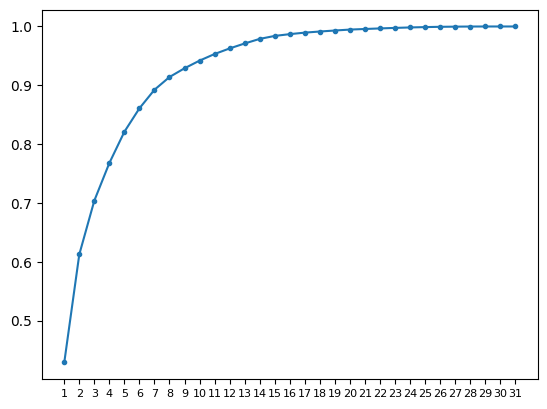

In [57]:
# plot the cumulative sum of the percentage of explained variance for each component and those before it.
plt.plot(range(1, 32), pca.explained_variance_ratio_.cumsum(), marker= '.')
plt.xticks(ticks=range(1,32), fontsize=8);

# Visualize Scree Plot

We can visualize the individual contribution of each principal component using a Scree plot

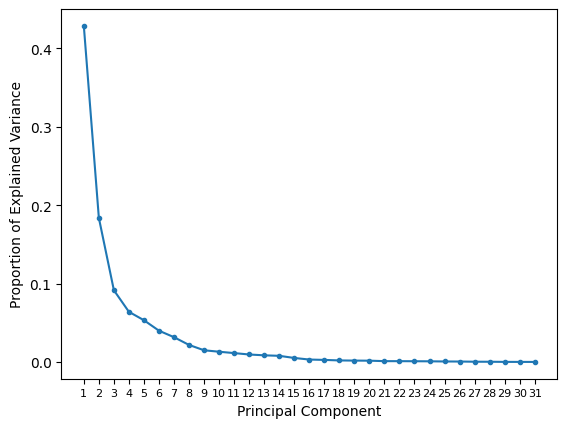

In [58]:
# Plot the explained variance ratios of the first 30 principal components
plt.plot(range(1, 32), pca.explained_variance_ratio_, marker=".")
plt.xticks(ticks=range(1,32), fontsize=8)
plt.xlabel("Principal Component")
plt.ylabel("Proportion of Explained Variance");

Based on the graph above, how many principal components should we keep? The "elbow" or inflection point on the graph above can be seen around 7 principal components.

In [59]:
pca= PCA(n_components=7)

# Specifying the Explained Variance

In [60]:
# PCA with 85% explained variance
pca = PCA(n_components=.85)

# Example of PCA with Supervised Learning


## Split Data into Training & Testing Sets


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

## Create a PCA Pipeline with Standard Scaler


In [62]:
# Create a transformer pipeline
transformer = make_pipeline(StandardScaler(), PCA(n_components=7))

## Put the PCA Pipeline in Another Pipeline with a Logistic Regression


In [63]:
#Instantiate Logistic Regression
logreg = LogisticRegression()
#Create pipe with transformer and logicstic regression model
logreg_pipe = make_pipeline(transformer, logreg)
#Fit the training data
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('pca', PCA(n_components=7))])),
                ('logisticregression', LogisticRegression())])

## Evaluate Model


In [64]:
print("Training Accuracy:", logreg_pipe.score(X_train, y_train))
print("Training Accuracy:", logreg_pipe.score(X_test, y_test))

Training Accuracy: 0.9835680751173709
Training Accuracy: 0.972027972027972
